<a href="https://colab.research.google.com/github/springboardmentor29803v-cpu/RideWise-Predicting-Bike-sharing-Demand/blob/Sriramula-Pallavi/Bike_sharing_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [53]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [54]:
dataset = pd.read_csv('/content/day.csv', encoding= 'unicode_escape')

# **DATA INSPECTION**

In [55]:
print(f' The shape of dataset is {(dataset.shape)} \n Total Rows are : {(dataset.shape)[0]}\n Total Columns are : {(dataset.shape)[1]}')

 The shape of dataset is (730, 16) 
 Total Rows are : 730
 Total Columns are : 16


In [56]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [57]:
dataset.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [59]:
dataset.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [60]:
dataset.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,31-12-2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


**OBSERVATIONS**

In [61]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [62]:
dataset['dteday'] = dataset['dteday'].astype('datetime64[ns]')

In [63]:
dataset['Month'] = dataset['dteday'].dt.month

dataset['Day'] = dataset['dteday'].dt.day_name()

In [64]:
dataset['Weekdays_or_weekend'] = dataset['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [65]:
dataset.drop(['dteday'],axis=1 ,inplace=True)

In [66]:
dataset.head(2)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month,Day,Weekdays_or_weekend
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,Monday,0
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2,Thursday,0


In [67]:
dataset['season'].value_counts()

,count
season,
3,188
2,184
1,180
4,178


In [68]:
dataset['holiday'].value_counts()

,count
holiday,
0,709
1,21


In [69]:
dataset['weekday'].value_counts()

,count
weekday,
6,105
0,105
1,105
2,104
4,104
5,104
3,103


In [70]:
dataset['workingday'].value_counts()

,count
workingday,
1,499
0,231


In [71]:
dataset['Month'].value_counts()

,count
Month,
1,62
3,62
7,62
5,62
12,62
10,62
8,62
4,60
9,60


In [72]:
dataset['Weekdays_or_weekend'].value_counts()

,count
Weekdays_or_weekend,
0,522
1,208


In [73]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month,Weekdays_or_weekend
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849,6.526027,0.284932
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647,3.450215,0.451691
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,1.000000,0.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000,4.000000,0.000000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000,7.000000,0.000000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000,10.000000,1.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,12.000000,1.000000


In [74]:
duplicates = dataset.duplicated().sum()
print(f"We have {duplicates} duplicate rows in our Bike Data.")

We have 0 duplicate rows in our Bike Data.


# Exploratory Data Analysis

In [75]:
numeric_features = dataset.describe().columns
numeric_features

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'Month', 'Weekdays_or_weekend'],
      dtype='object')

In [76]:
categorical_columns = list(set(dataset.columns) - set(numeric_features))
categorical_columns

['Day']

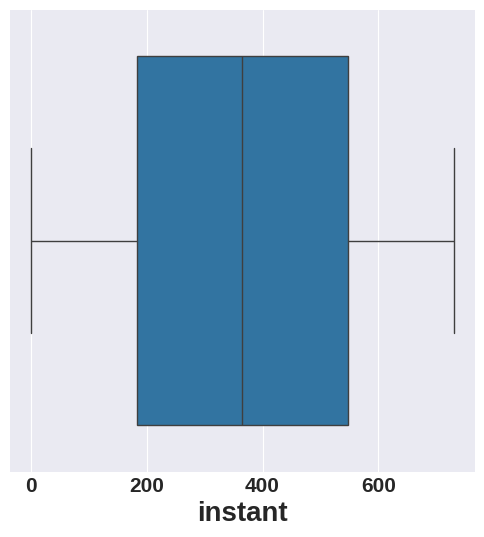

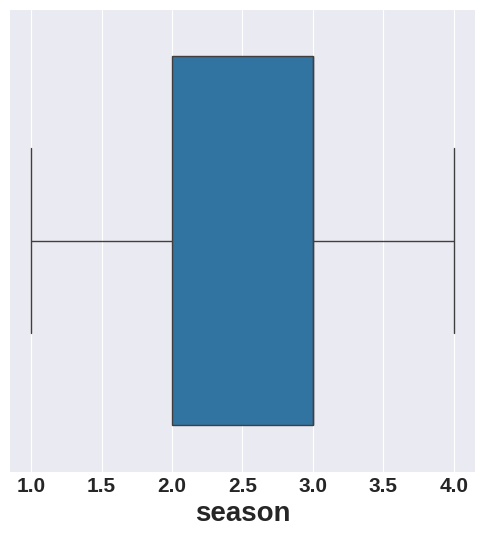

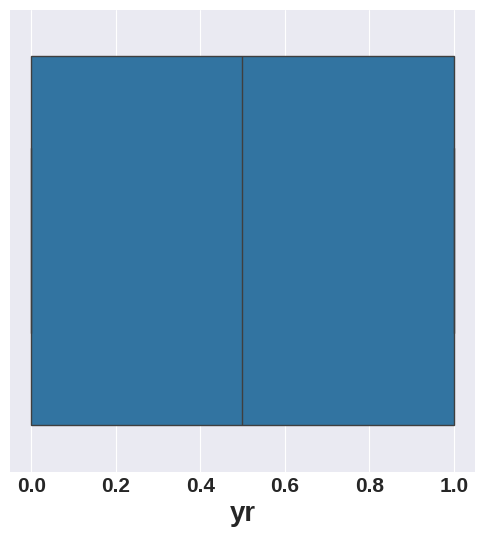

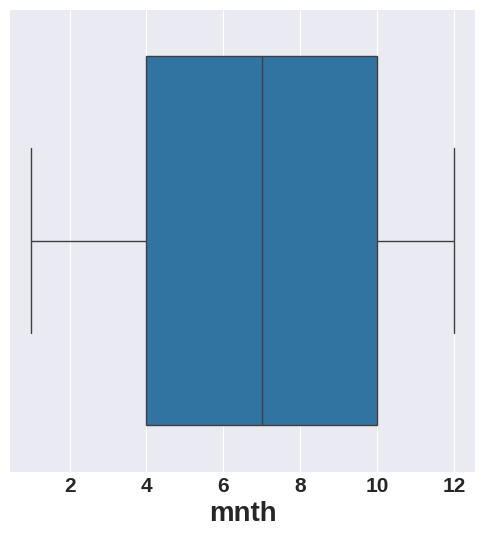

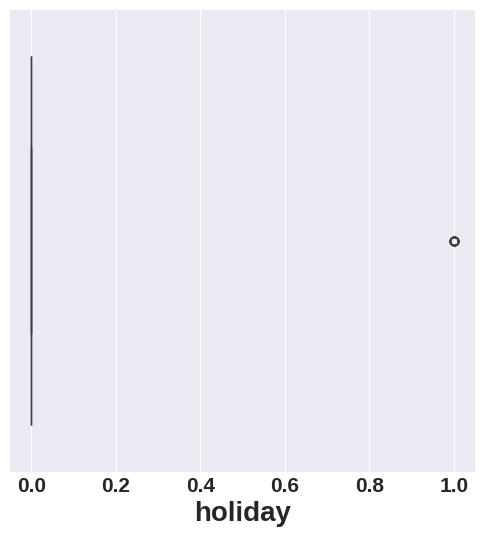

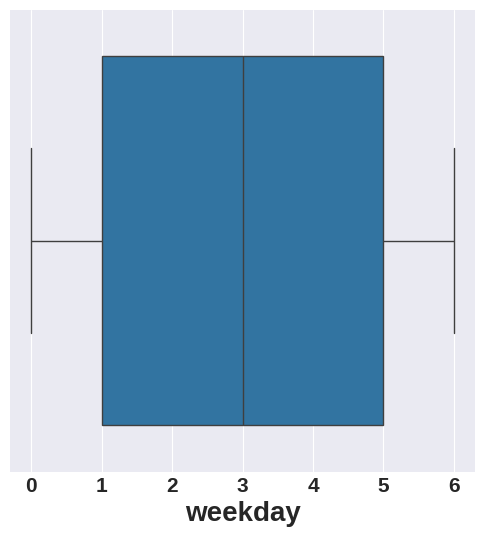

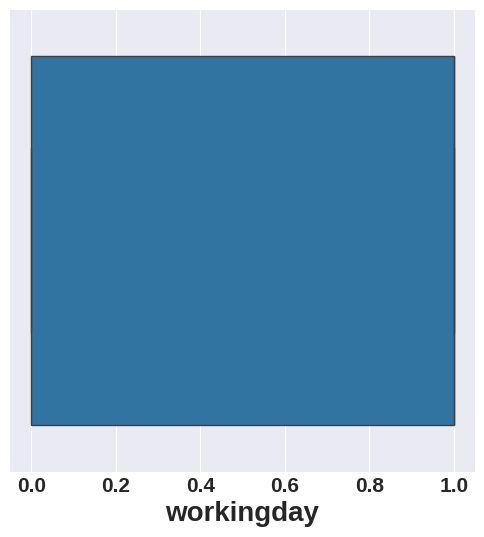

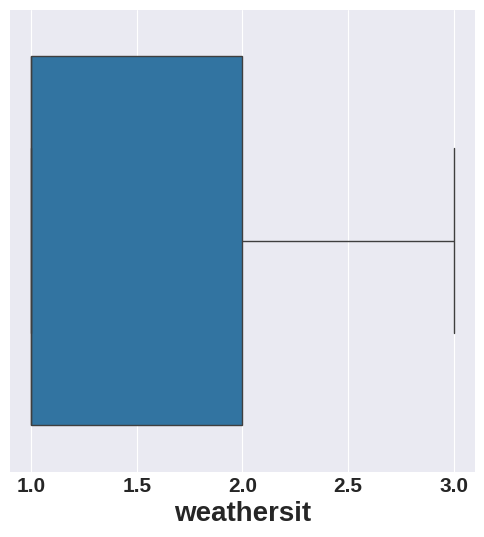

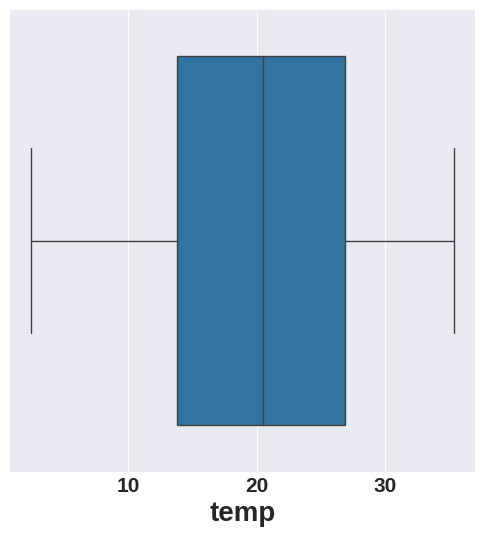

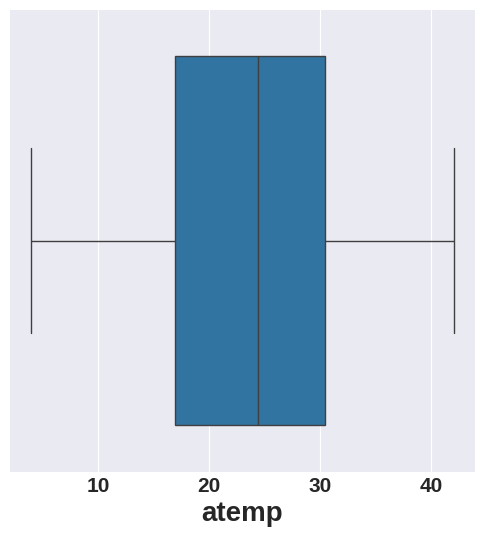

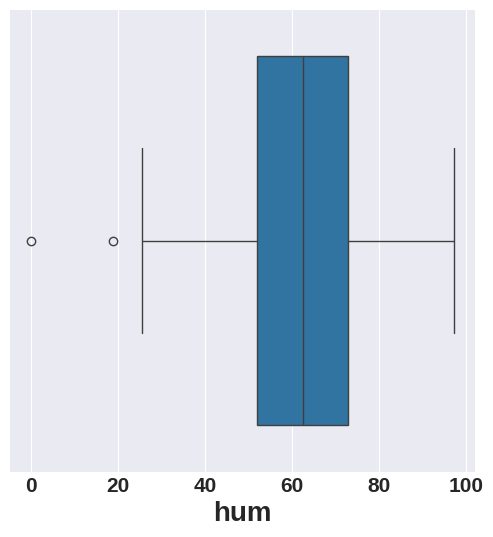

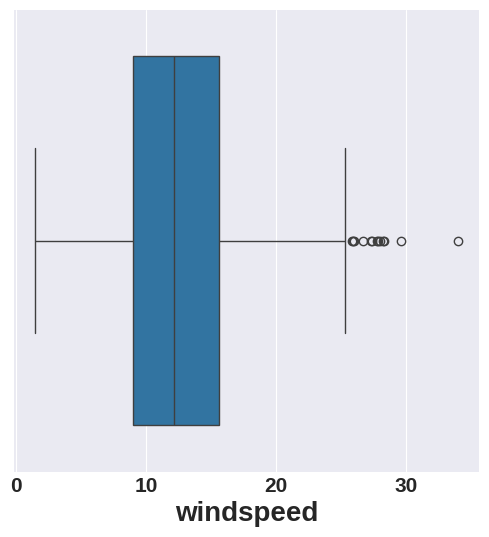

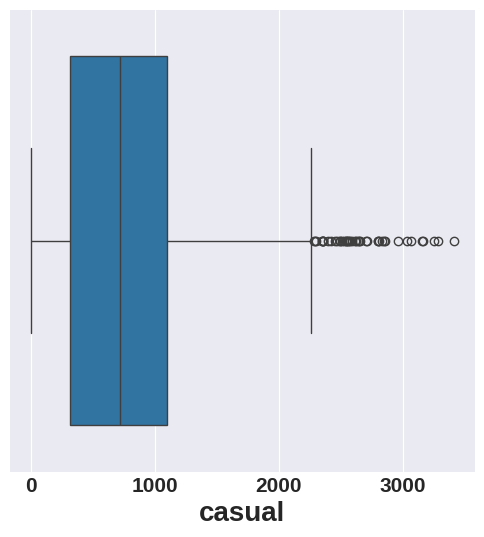

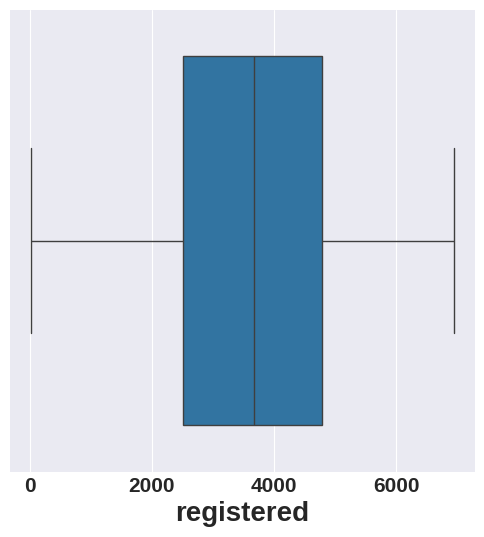

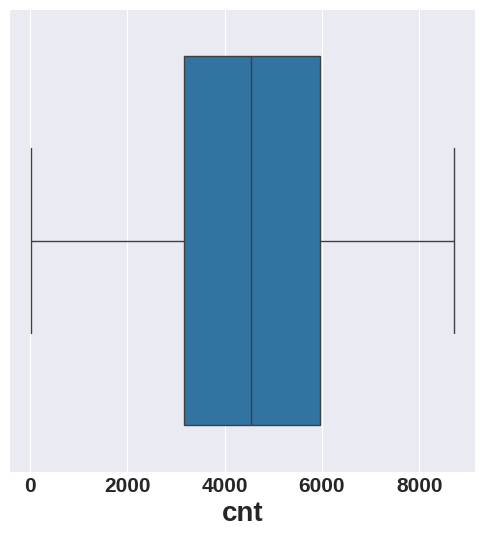

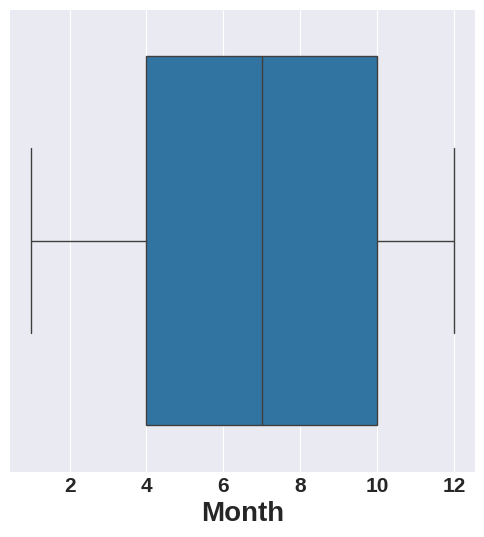

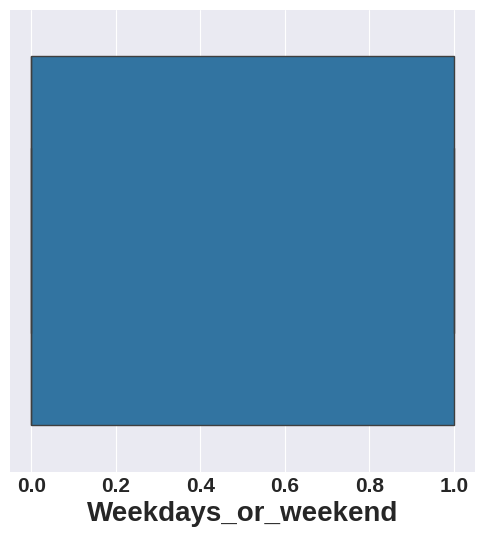

In [77]:
for col in numeric_features:
  fig = plt.figure(figsize = (6,6))
  ax = fig.gca()
  sns.boxplot(x = dataset[col])

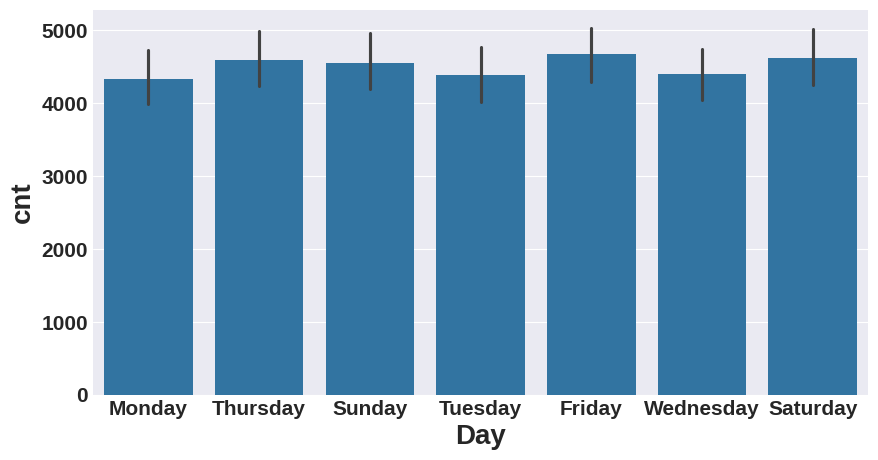

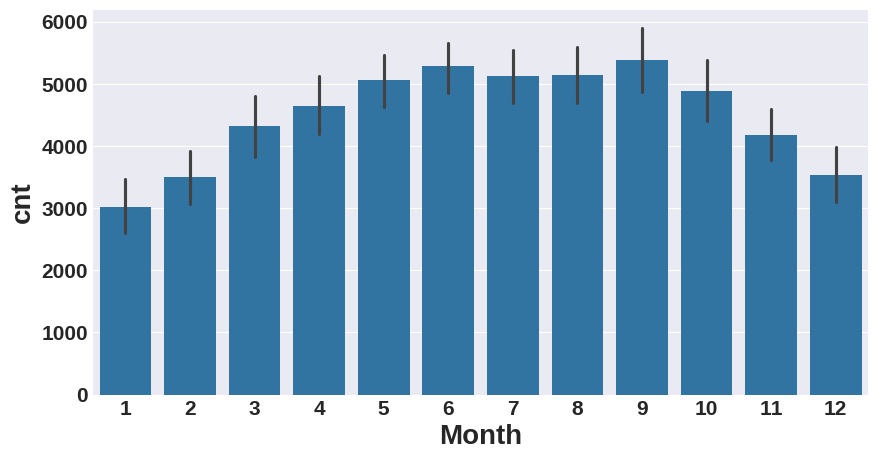

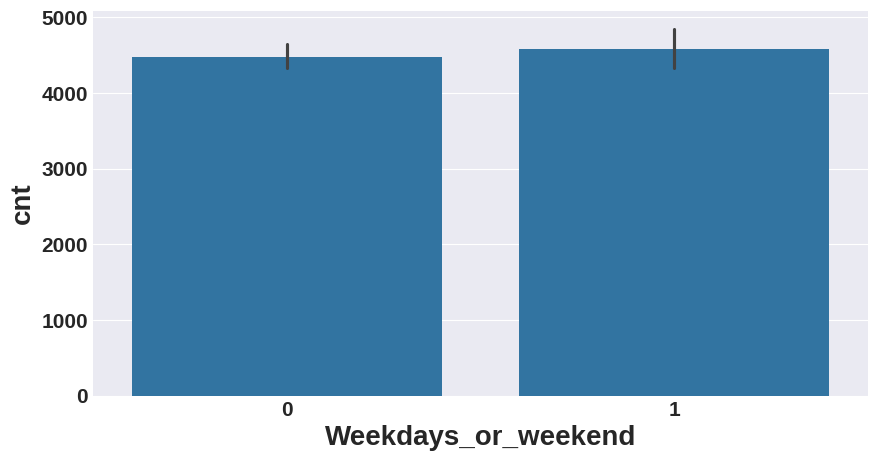

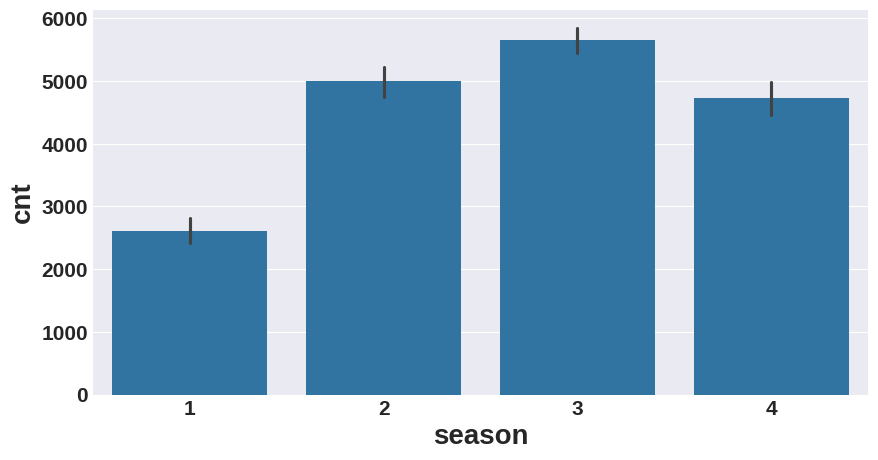

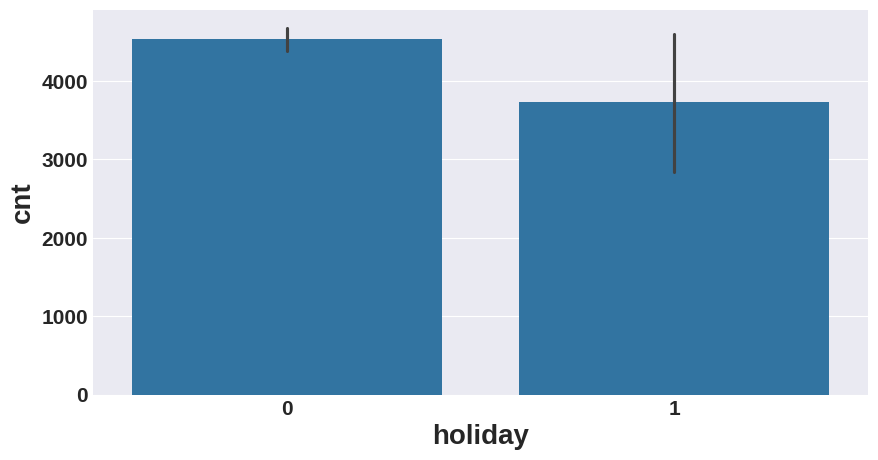

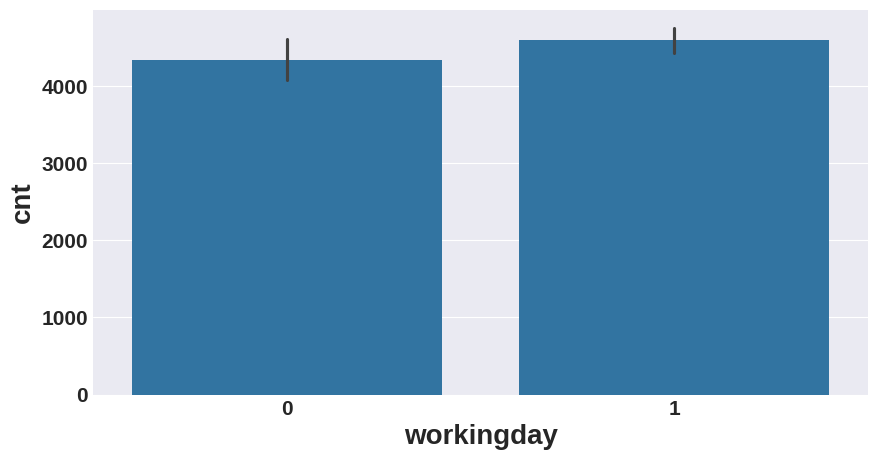

In [78]:
categorical_columns.extend(['Month','Weekdays_or_weekend','season','holiday','workingday'])


for col in categorical_columns:
    fig = plt.figure(figsize=(10, 5))
    ax = fig.gca()
    sns.barplot(x = dataset[col],y = dataset['cnt'])

# **Observations**
-> Most records belong to working days and clear weather condiitons, meaning people ride bikes more often when the weather is good and it's a regular weekday.     

-> The season-wise bars show higher counts during summer and fall, which indicates those seasons have more bike-sharing activity compared to winter or spring.

# Dependent Variable (cnt) Vs Categorical Columns

Text(0.5, 1.0, 'Bike Rental Trend according to month on Holiday / No Holiday')

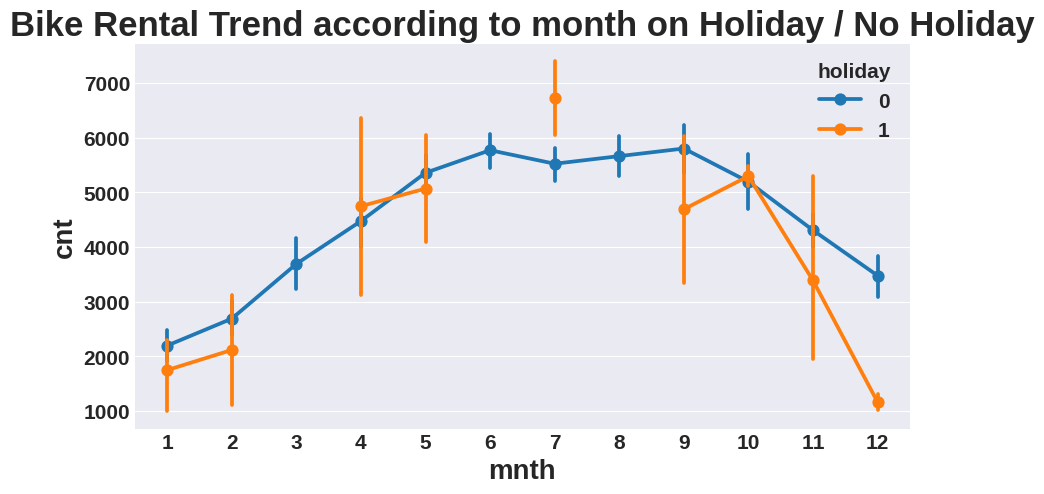

In [79]:
plt.figure(figsize=(10,5))
sns.pointplot(x = dataset['mnth'],y = dataset['cnt'],hue = dataset['holiday'])
plt.title("Bike Rental Trend according to month on Holiday / No Holiday")

-> Bike rentals increase from Jan to Jun-sep and drop after that. Non-holidays have higher demand than holidays.

Text(0.5, 1.0, 'Bike Rental Trend according to season on Workingday')

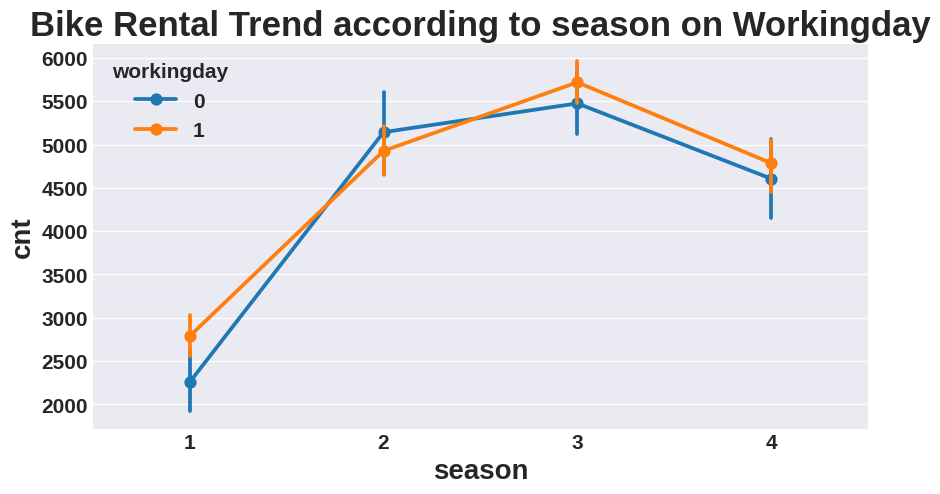

In [80]:
plt.figure(figsize=(10,5))
sns.pointplot(x = dataset['season'],y = dataset['cnt'],hue = dataset['workingday'])
plt.title("Bike Rental Trend according to season on Workingday")

-> Summer & Fall seasons have the highest.

-> Working days > Non- working days in every season.

-> Indicates bike use mainly for daily commuting and good weather conditions.

Text(0.5, 1.0, 'Bike Rental Trend according to weekday on Working day or No working day')

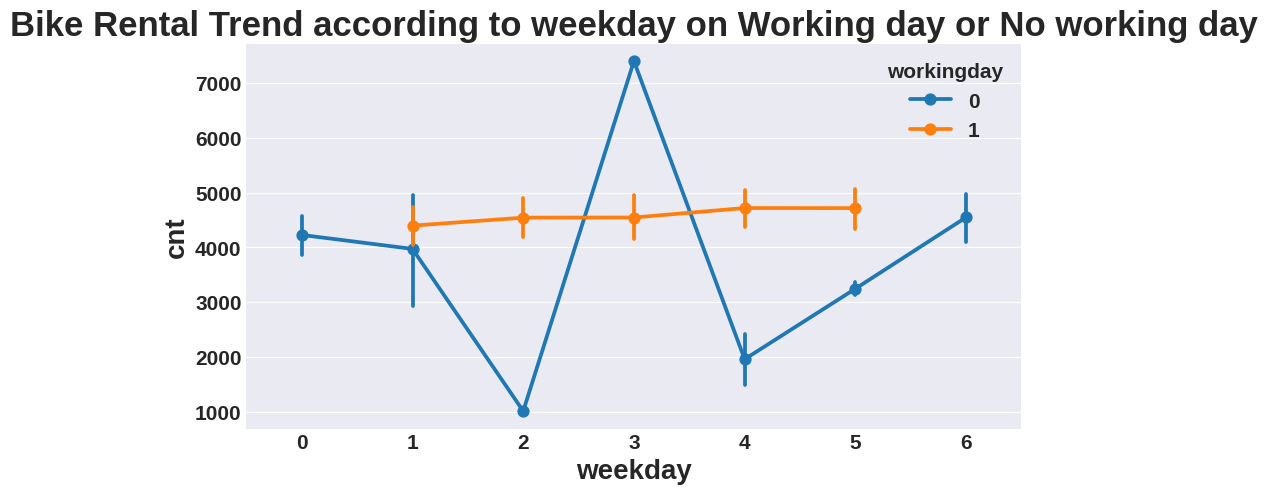

In [81]:
plt.figure(figsize=(10,5))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['workingday'])
plt.title("Bike Rental Trend according to weekday on Working day or No working day")

-> Working days show consistent, higher rentals.

-> Non-working days show smaller peaks on weekends.

Text(0.5, 1.0, 'Bike Rental Trend according to weekday on season')

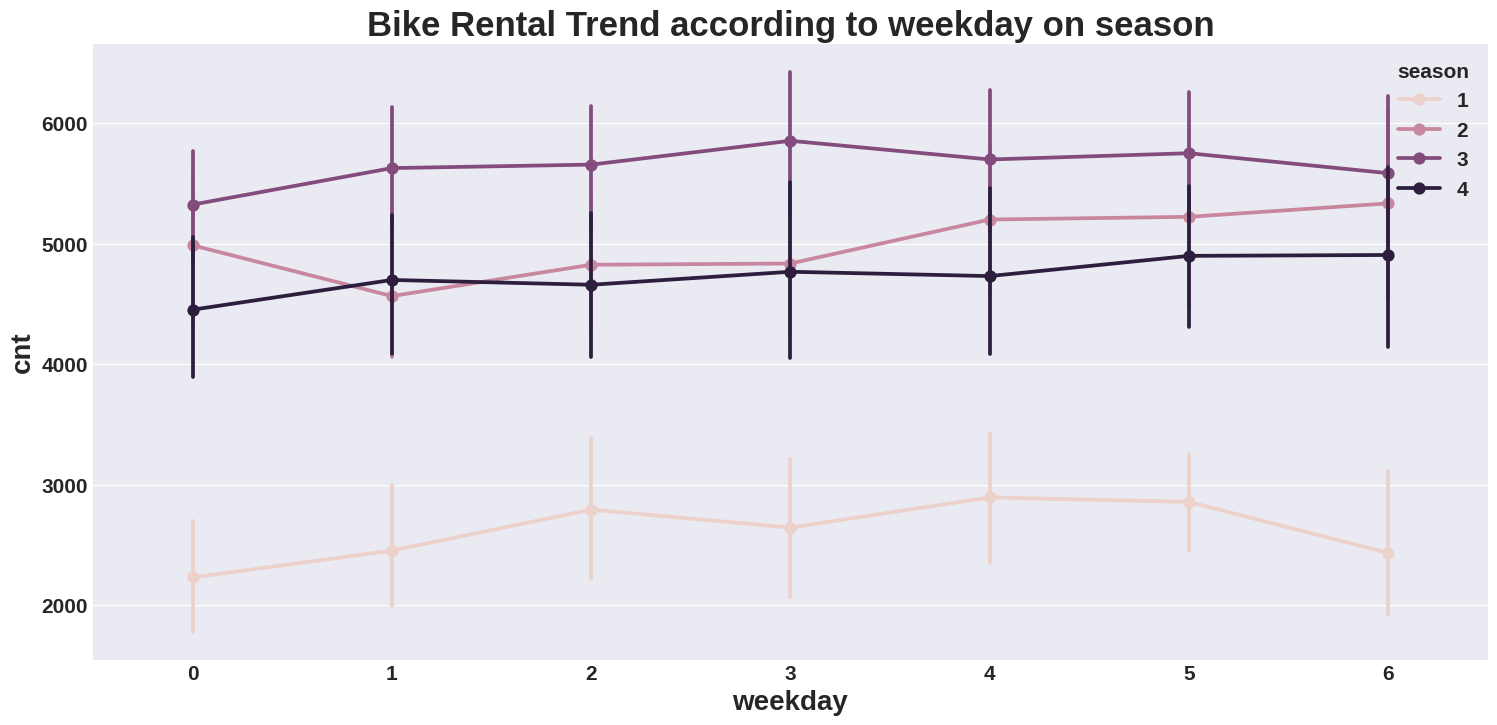

In [82]:
plt.figure(figsize=(18,8))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['season'])
plt.title("Bike Rental Trend according to weekday on season")

-> Rentals stay fairly stable across weekdays.

-> Slight increase on weekends, especially in Summer/Fall

Text(0.5, 1.0, 'Bike Rental Trend according to weathersit on season')

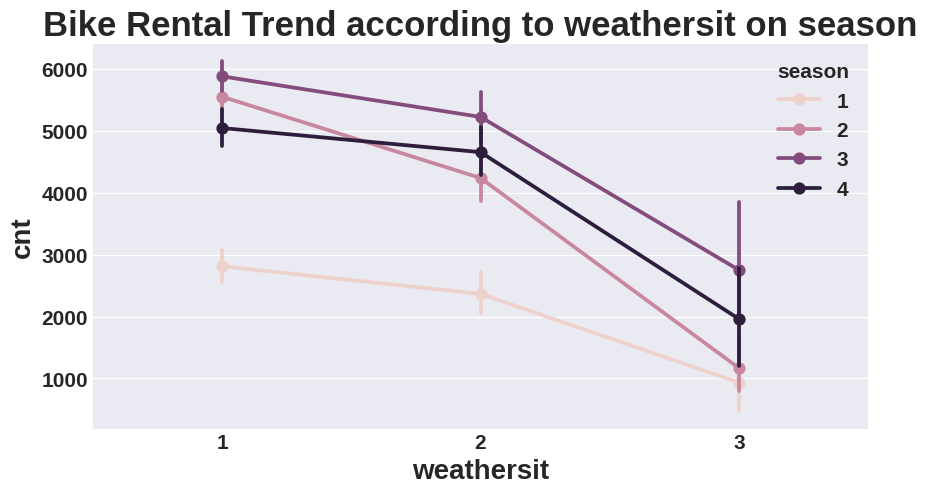

In [83]:
plt.figure(figsize=(10,5))
sns.pointplot(x = dataset['weathersit'],y = dataset['cnt'],hue = dataset['season'])
plt.title("Bike Rental Trend according to weathersit on season")

-> Clear weather - highest rentals; Rain - lowest rentals

-> Bad weather decreases demand in all seasons.

-> Weather condition is a strong factor affecting rentals.

# Distrubion of Target Variable

<Axes: xlabel='cnt'>

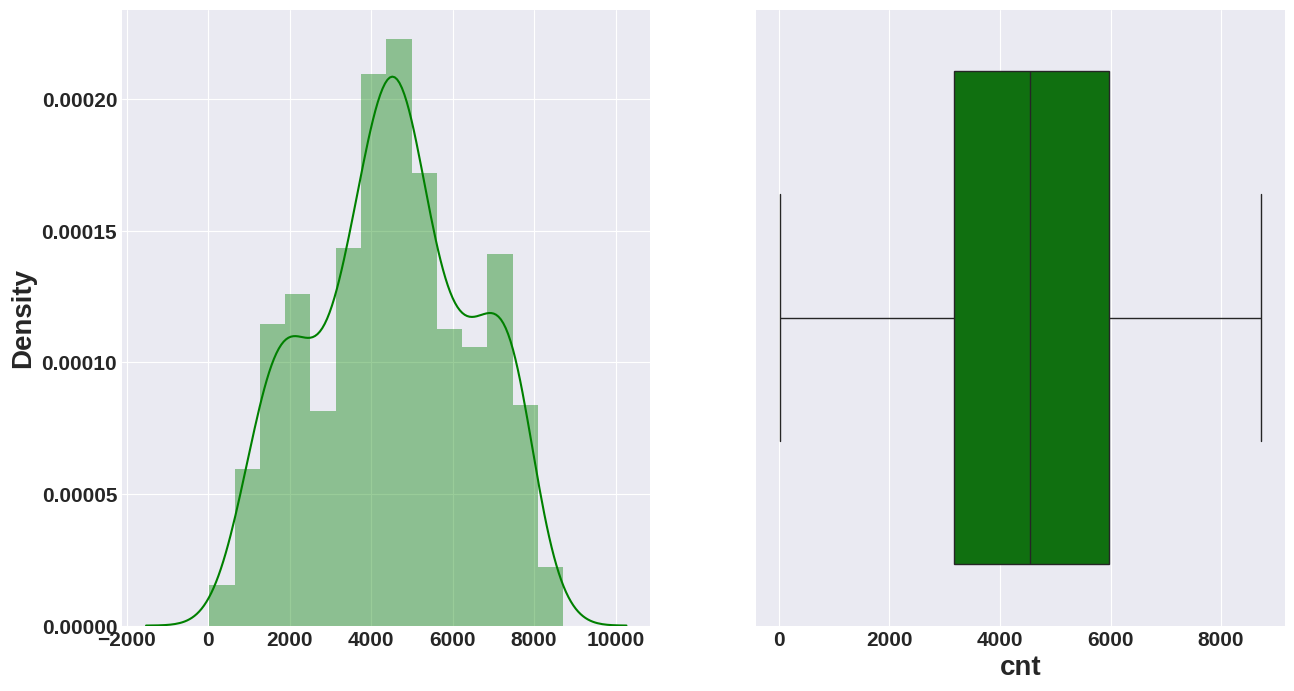

In [84]:
# Distrubution of target varible - "Rented Bike Count"
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= dataset['cnt'],color='g',ax=axes[0])
sns.boxplot(x = dataset['cnt'],color='g',ax=axes[1])

<Axes: xlabel='cnt'>

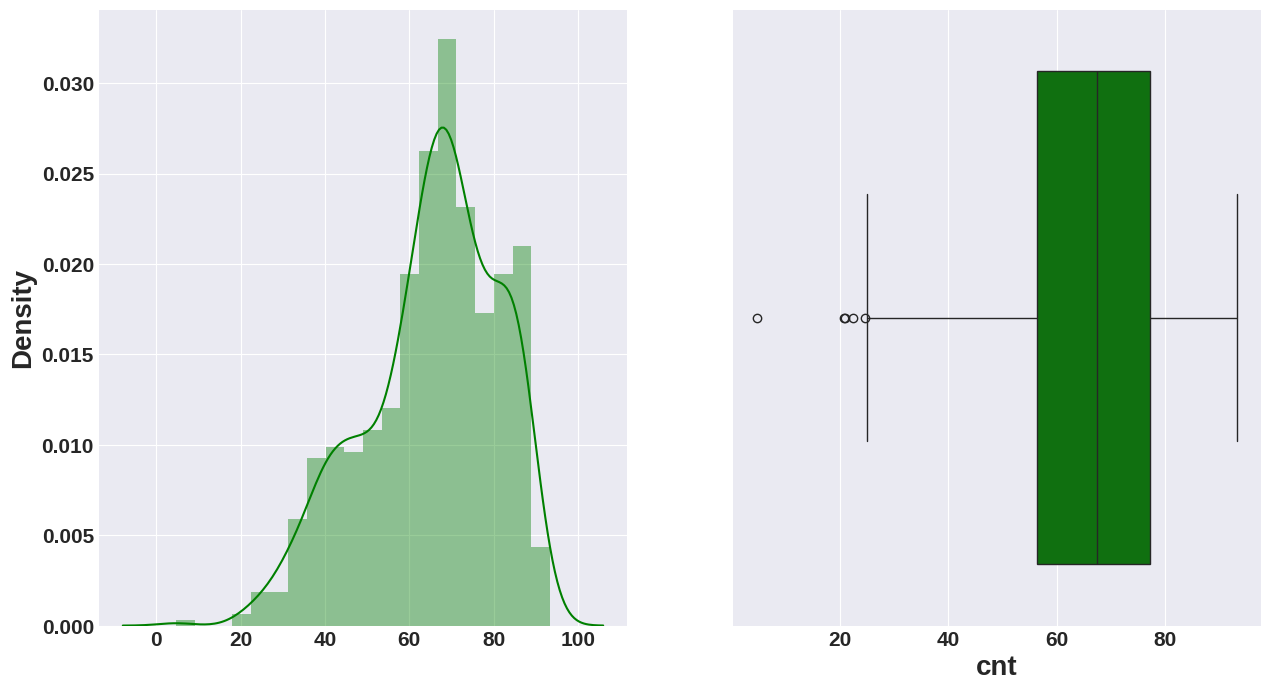

In [85]:
# Normalizing  our target variable by squre root method
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= np.sqrt(dataset['cnt']),color='g',ax=axes[0])
sns.boxplot(x = np.sqrt(dataset['cnt']),color='g',ax=axes[1])

# Univariate Analysis

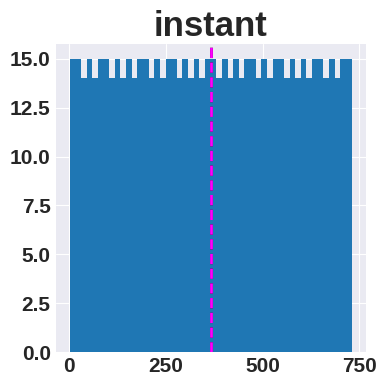

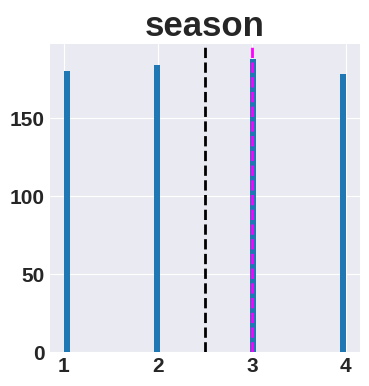

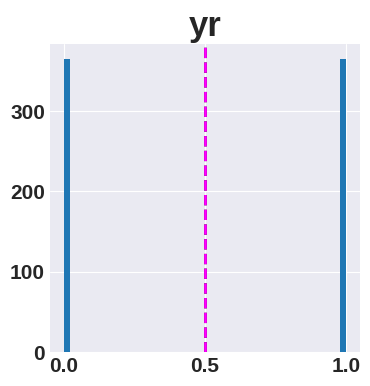

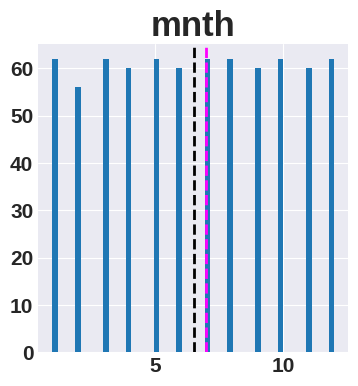

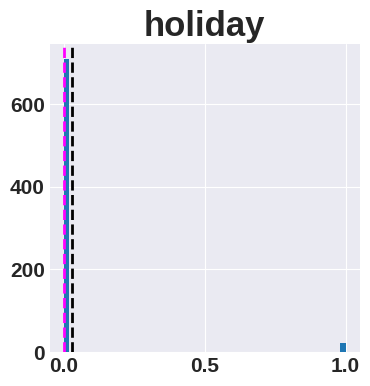

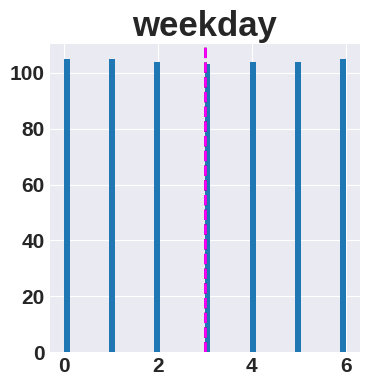

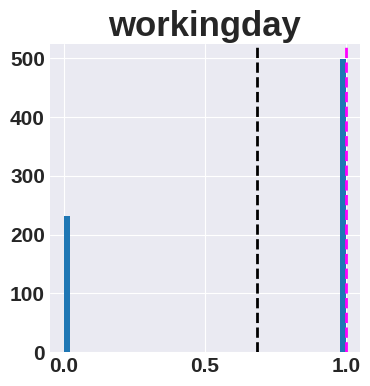

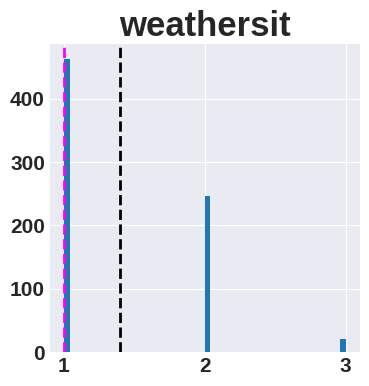

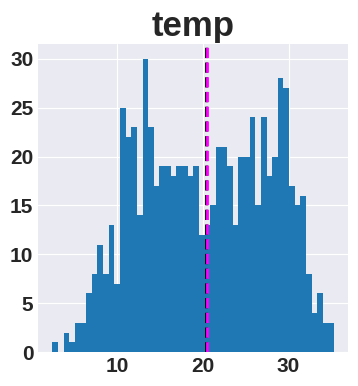

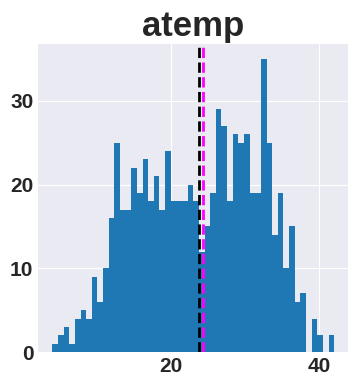

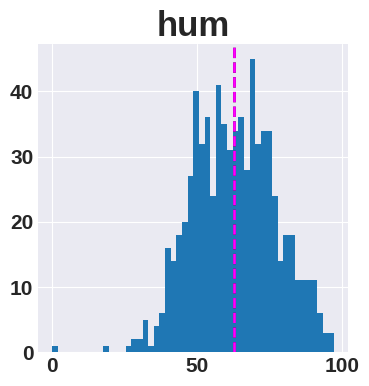

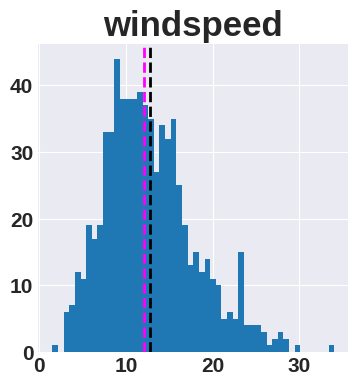

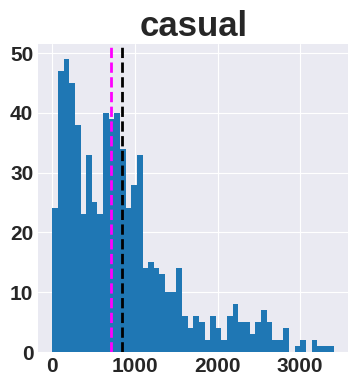

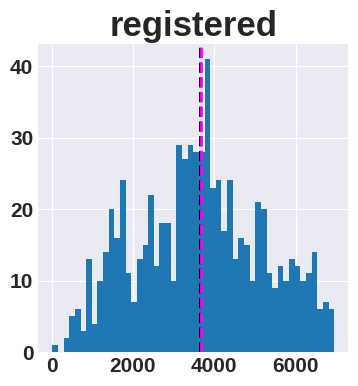

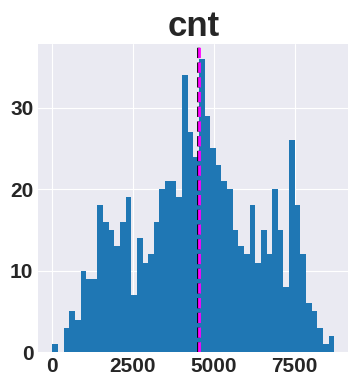

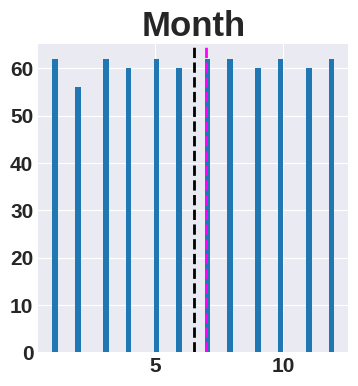

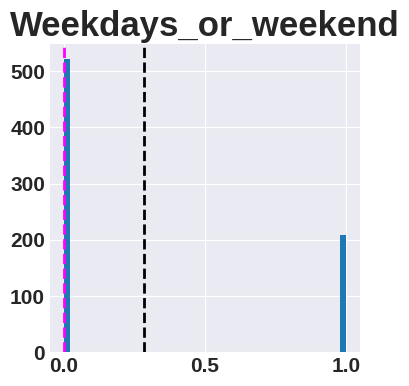

In [86]:
for col in numeric_features:
    fig = plt.figure(figsize=(4,4))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='black', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
    plt.title(col)
plt.show()

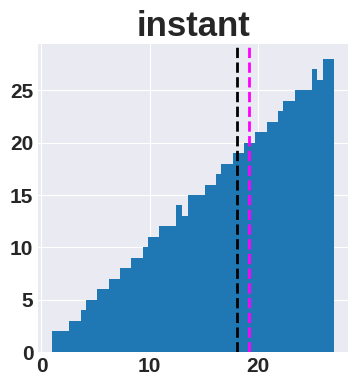

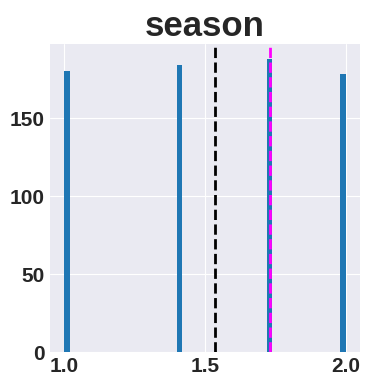

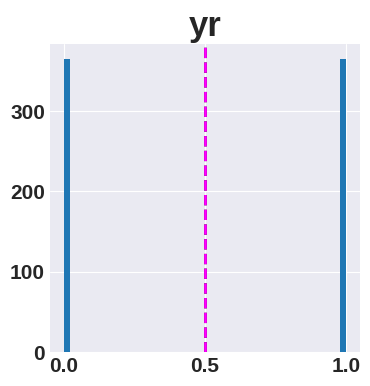

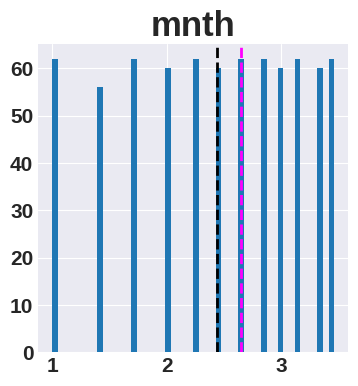

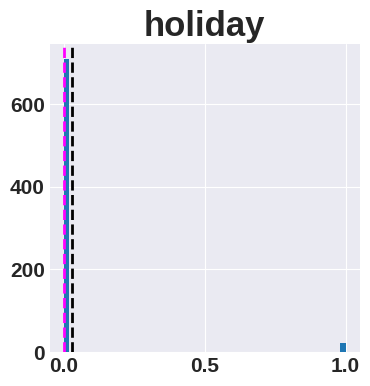

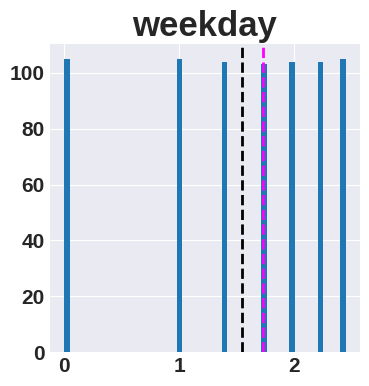

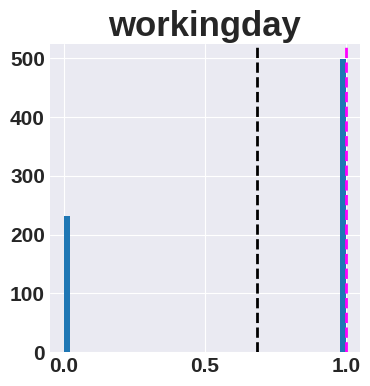

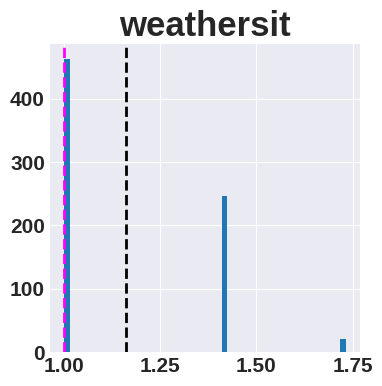

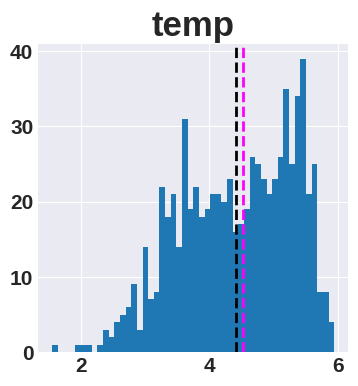

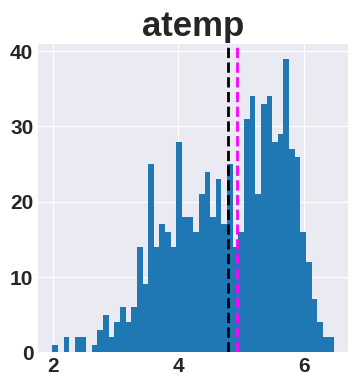

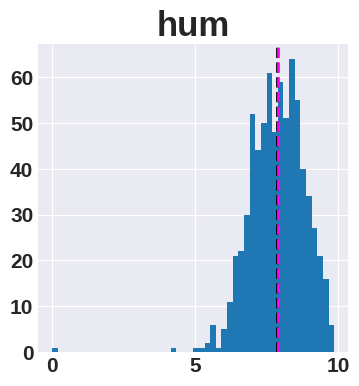

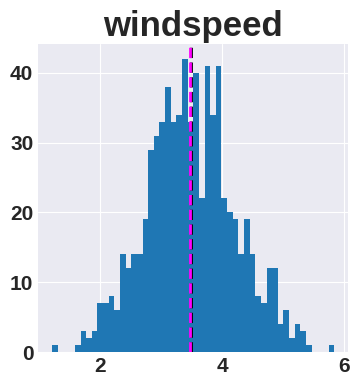

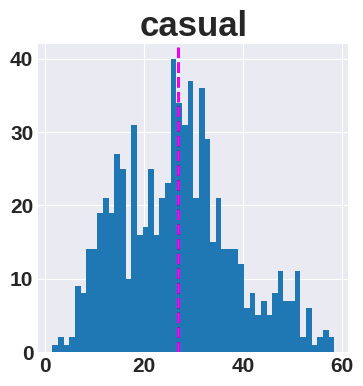

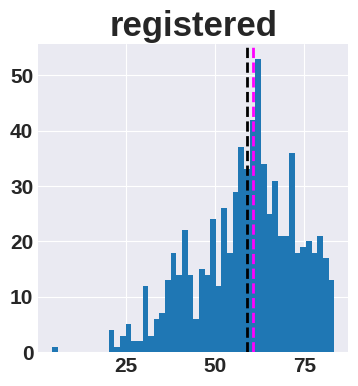

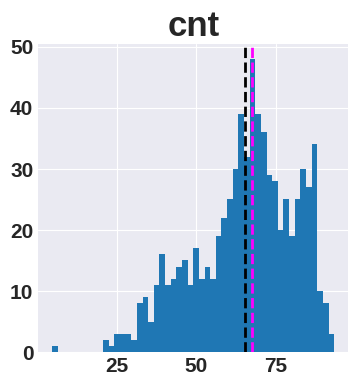

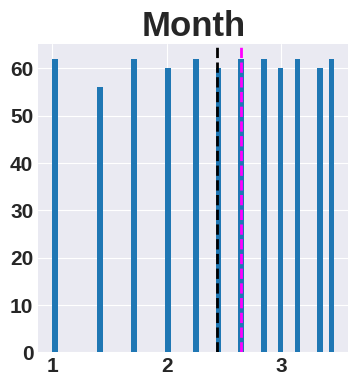

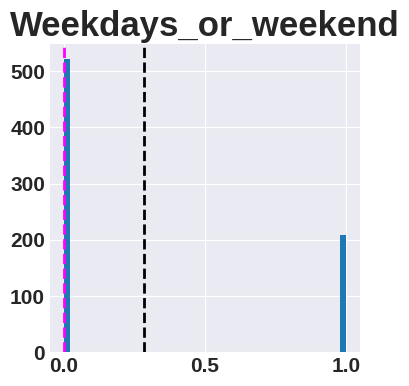

In [87]:
# Normalizing The variables using squre root method.
for col in numeric_features:
    fig = plt.figure(figsize=(4,4))
    ax = fig.gca()
    feature = np.sqrt(dataset[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='black', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

# Bivariate Analysis

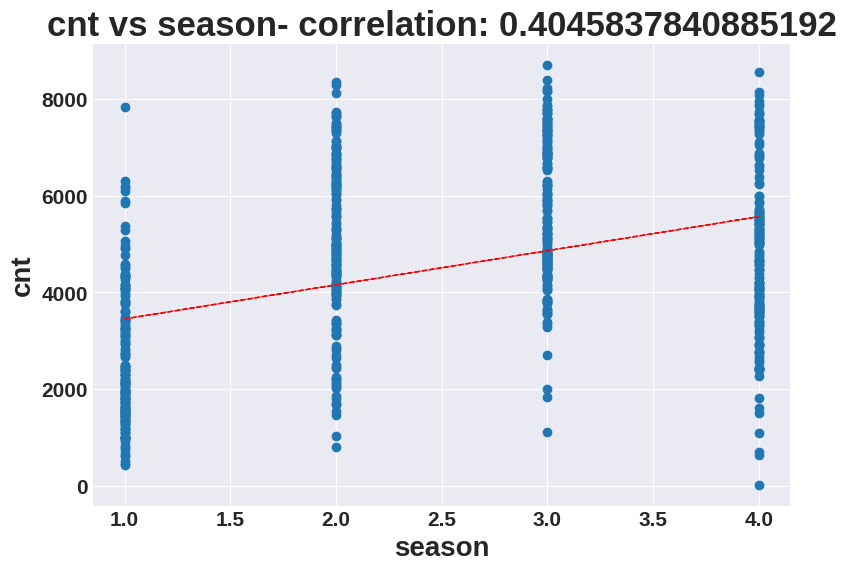

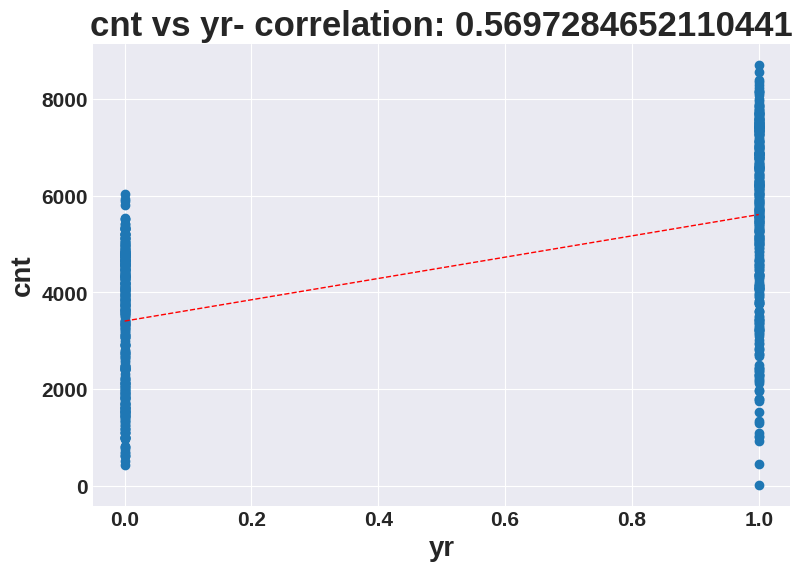

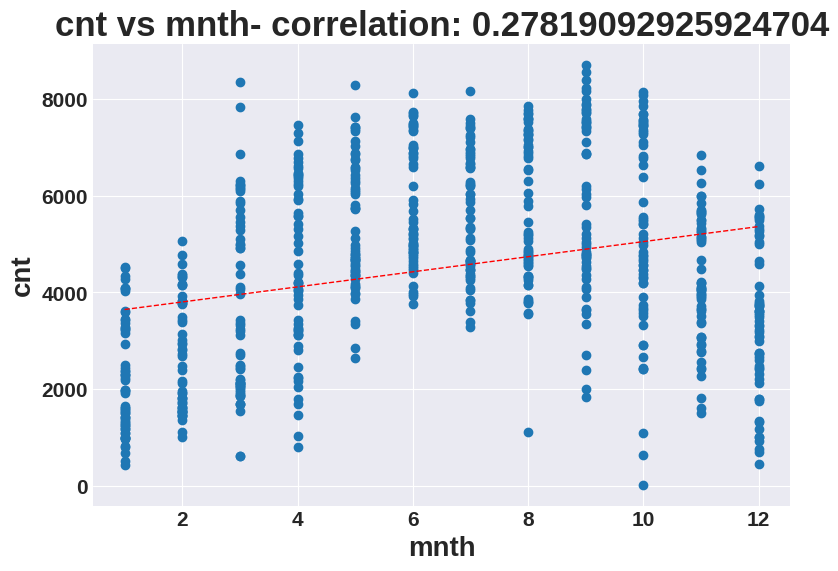

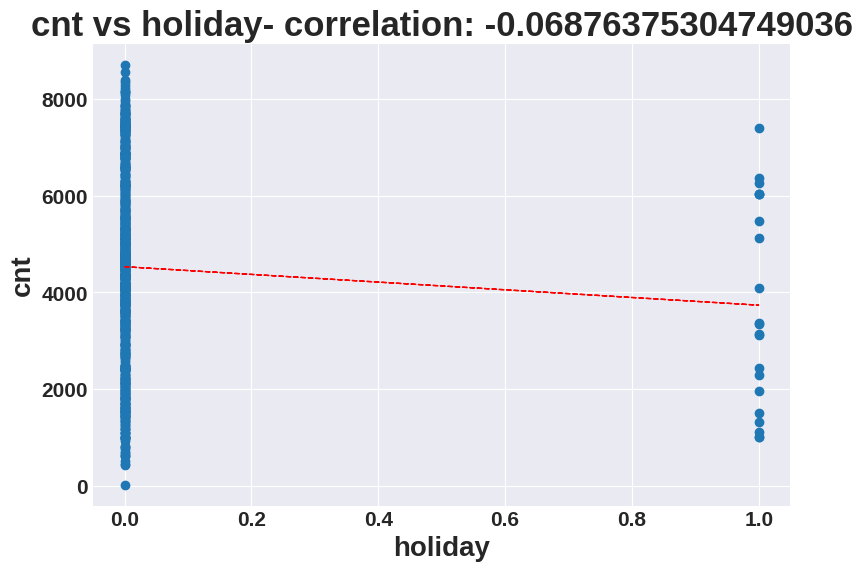

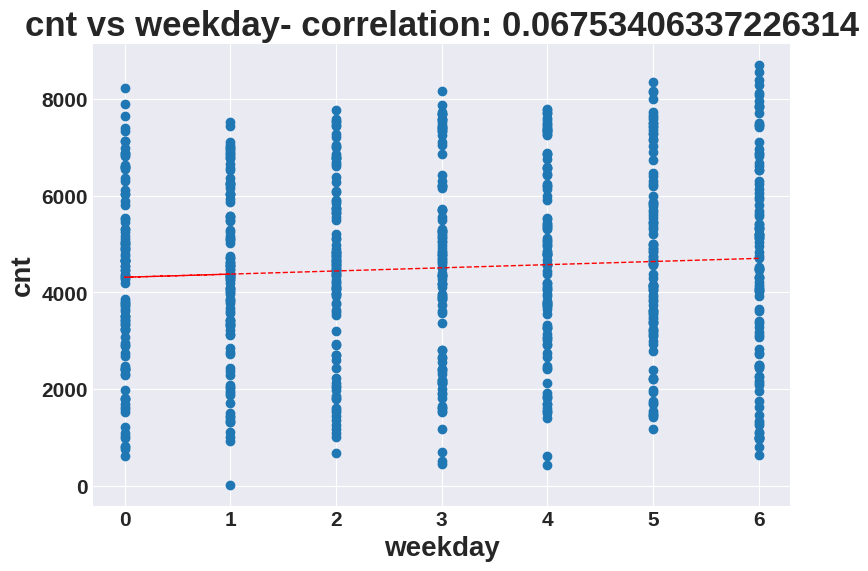

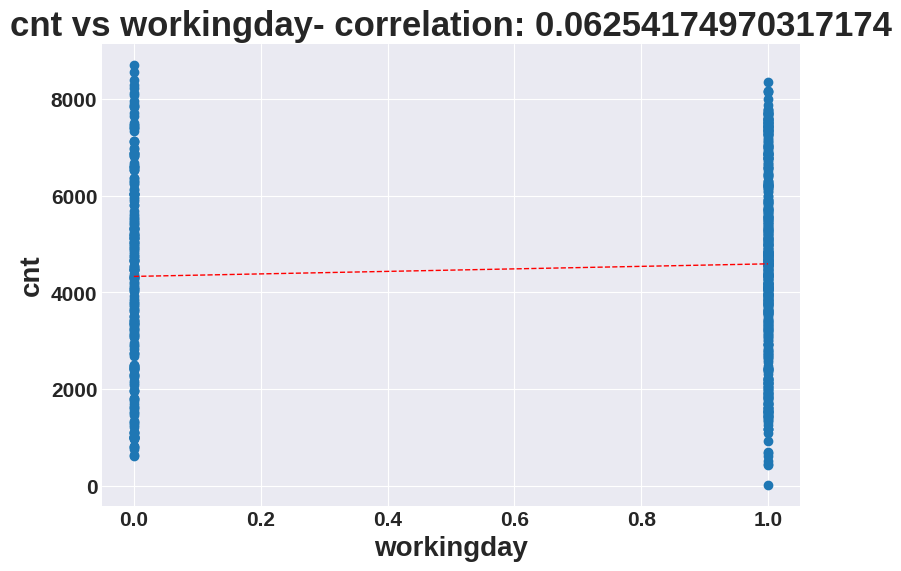

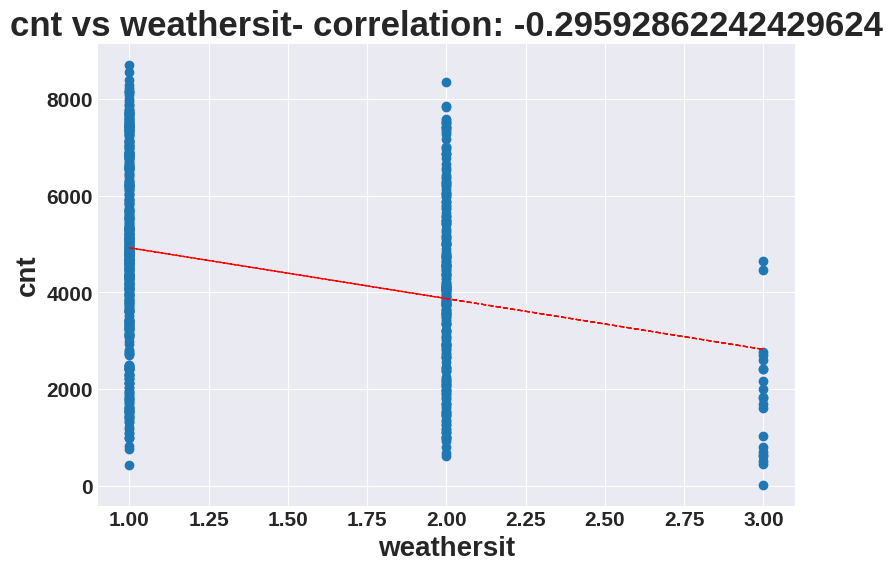

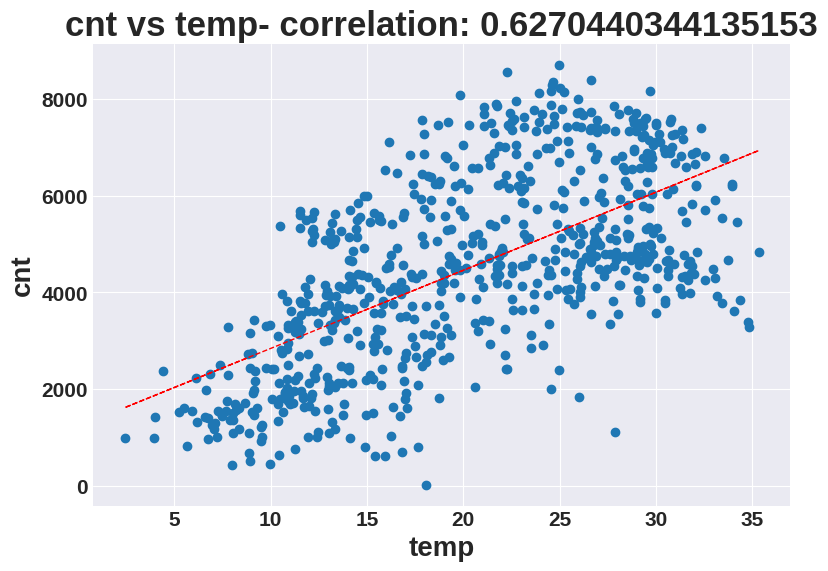

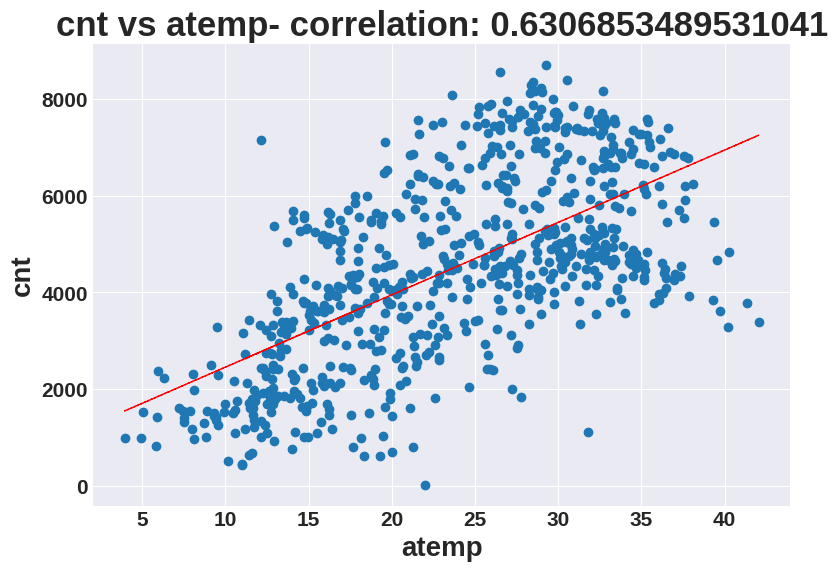

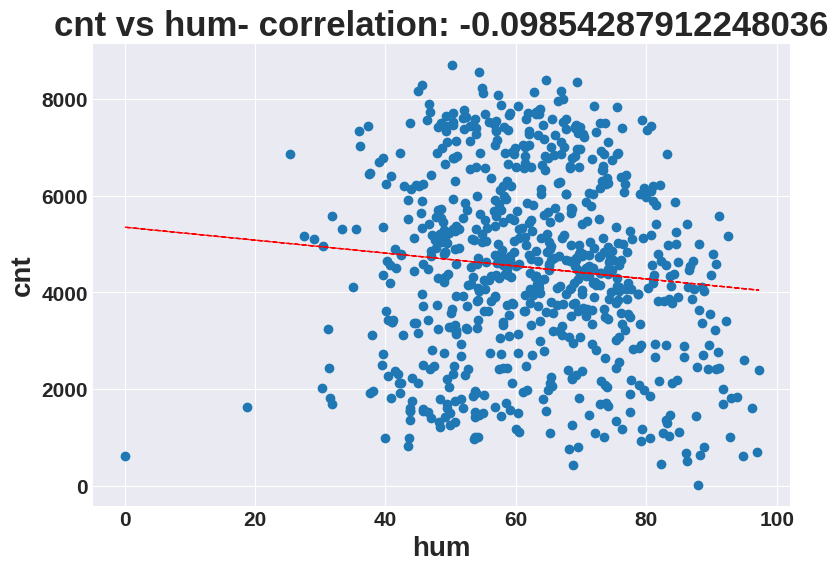

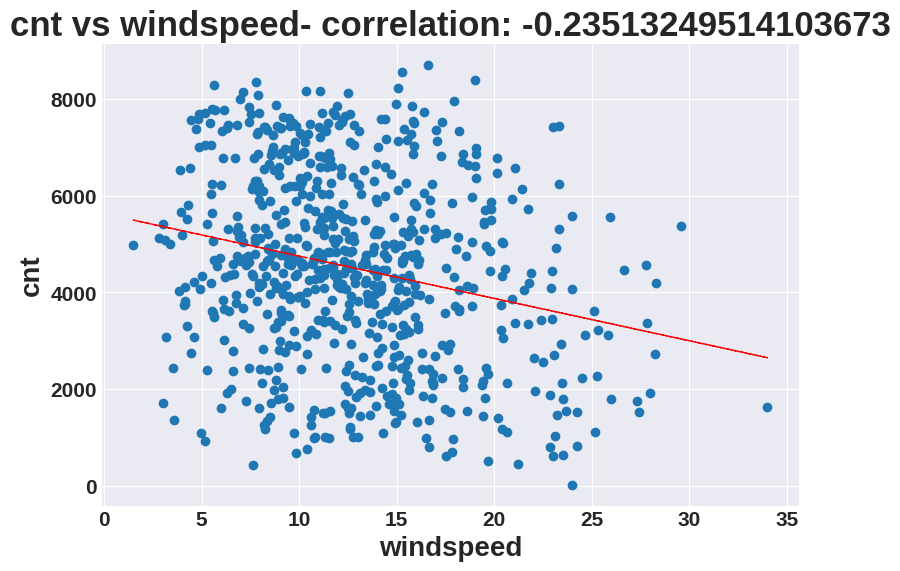

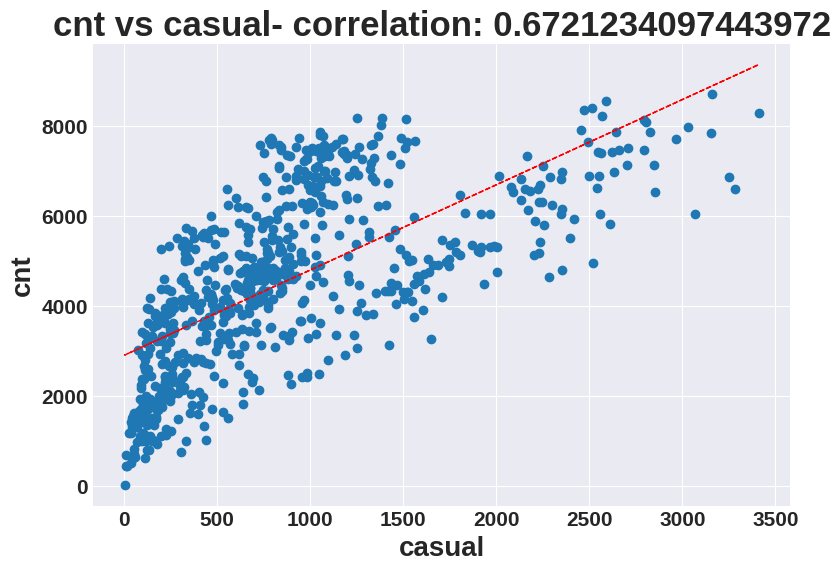

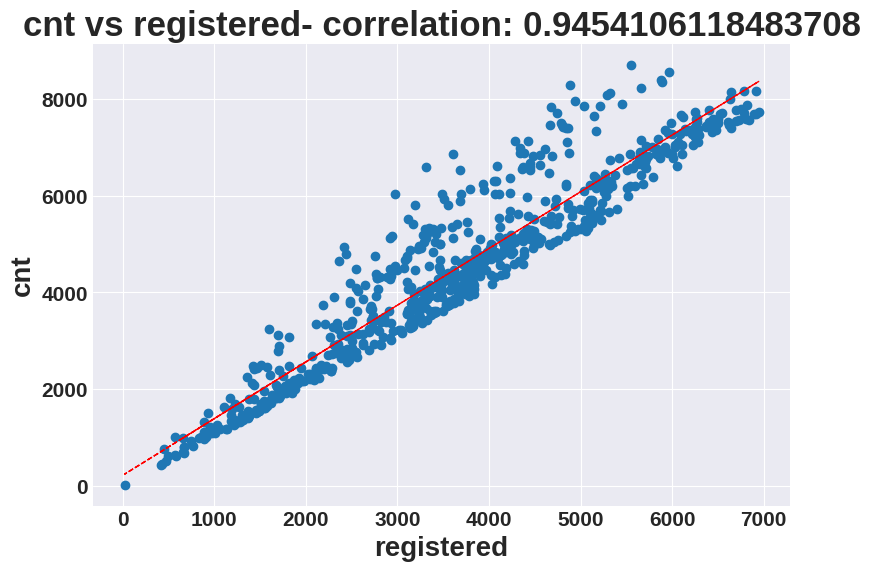

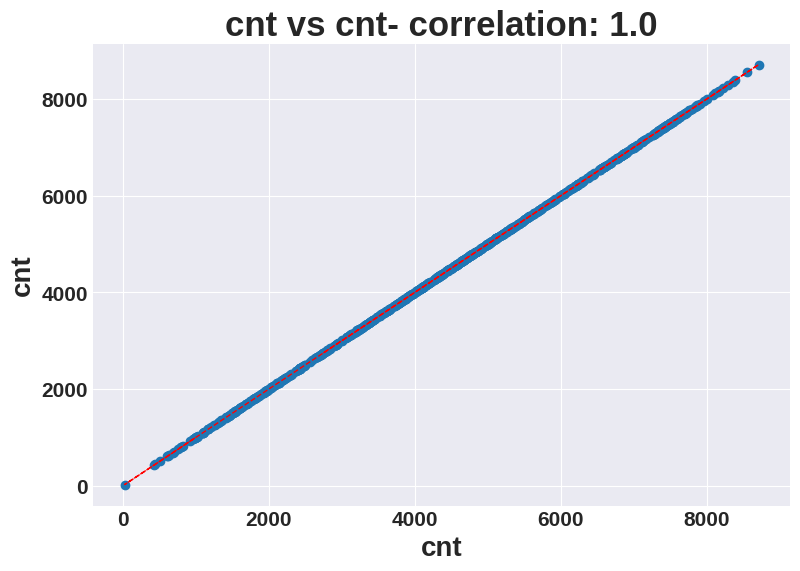

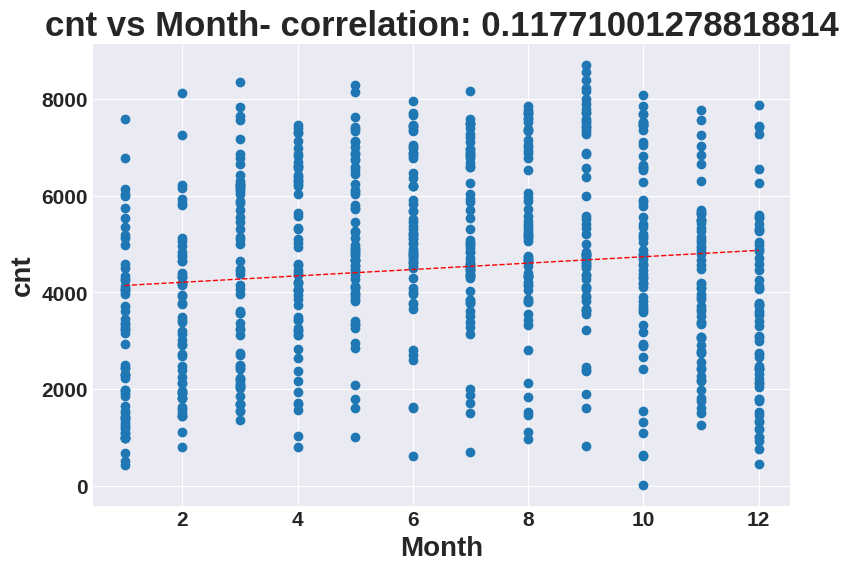

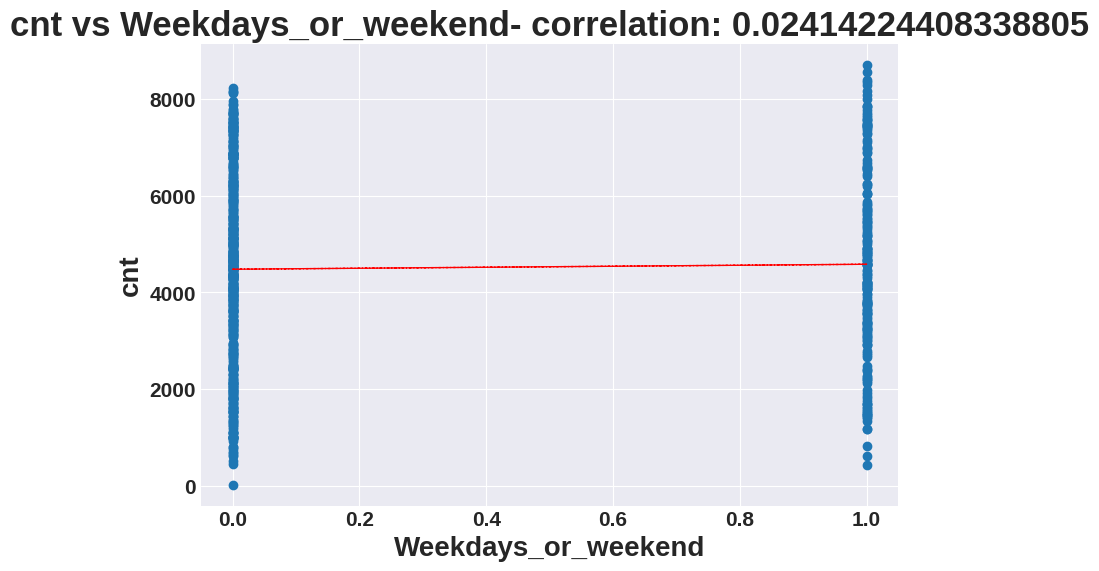

In [88]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('cnt')
    ax.set_title('cnt vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['cnt'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

<Axes: >

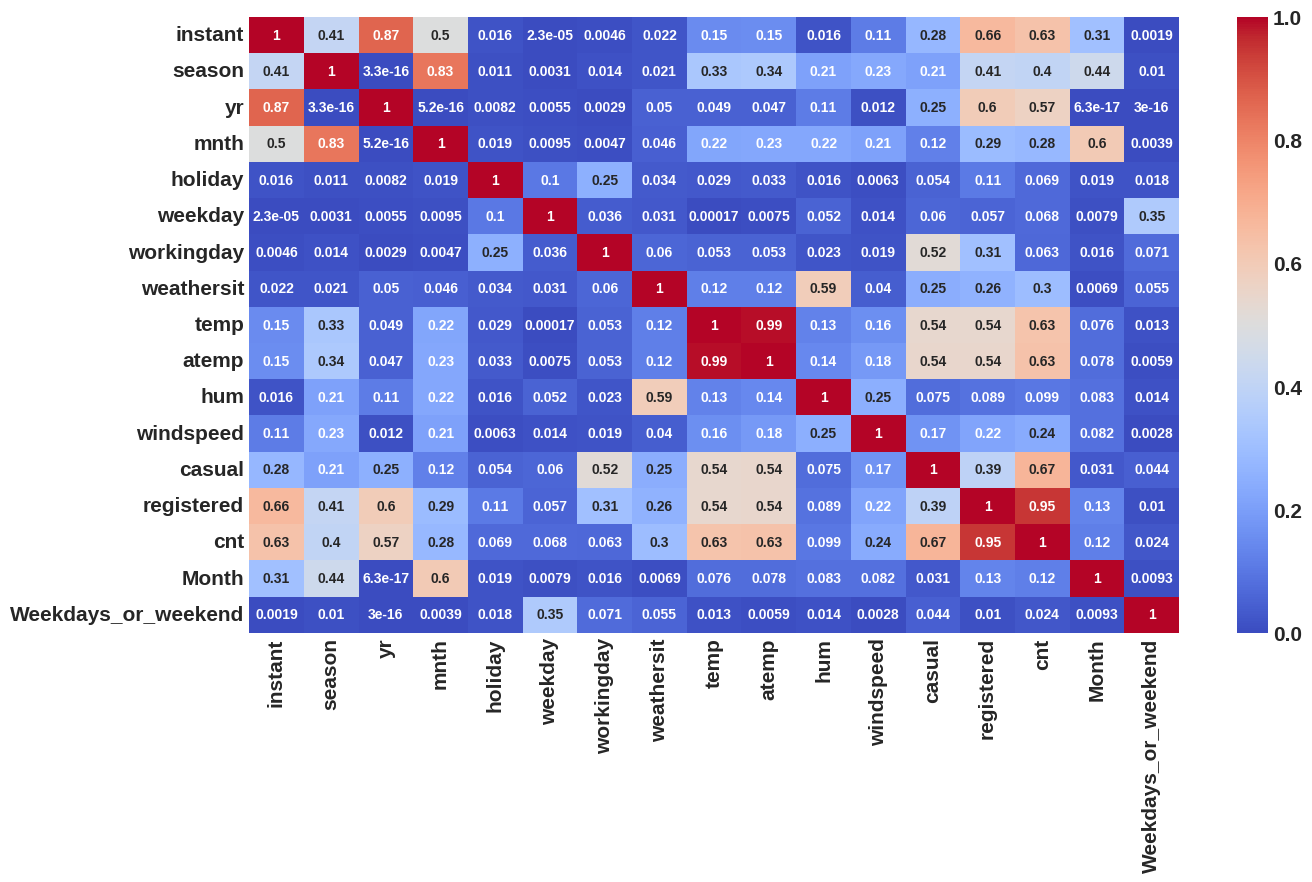

In [89]:
## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.drop('Day', axis=1).corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [91]:
df = dataset.copy()

In [92]:
df.head(2)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month,Day,Weekdays_or_weekend
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,Monday,0
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2,Thursday,0


#**Obseravations:**

-> Peak Demand Times: Bike usage is highest during morning and evening hour matching daily commute patterns.

-> Weekly Trends: Demand is higher on working days compared to weekends and holidays.

-> Seasonal Impact: Warmer seasons (spring and summer) show higher bike demand, while colder months see a drop.

-> Weather Influence: Clear and pleasant weather increases rides, while rain, humidity, and wind reduce usage.

-> Data Insights: The dataset is clean and ready for modeling, with features like season, weather, and temperature strongly influencing demand.

-> Key Takeaway: Bike-sharing demand depends on a mix of time, weather, and seasonal factors—insights that can help in efficient resource planning and operations.